In [1]:
from __future__ import print_function

%matplotlib inline

from hippounit.utils import ModelLoader
from hippounit import tests

from json2html import *
import pkg_resources
import json
import collections
import numpy
import IPython

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Figure 9 B

## Instantiating the model

The ModelLoader class of HippoUnit is instantiated and the model, and simulation related parameters are set.

In [2]:
# path to mod files
mod_files_path = "../published_models/Hemond_et_al_2008_ca3b/"

#all the outputs will be saved here. It will be an argument to the test.
base_directory = '../published_models_validation_results/'

#Load cell model
model = ModelLoader(mod_files_path = mod_files_path )

# outputs will be saved in subfolders named like this:
model.name="Hemond_2008_fig9b"

# path to hoc file
# the model must not display any GUI!!
model.hocpath = "../published_models/Hemond_et_al_2008_ca3b/main_model_fig9b.hoc"

# If the hoc file doesn't contain a template, this must be None (the default value is None)
model.template_name = None

# model.SomaSecList_name should be None, if there is no Section List in the model for the soma, or if the name of the soma section is given by setting model.soma (the default value is None)
model.SomaSecList_name = None
# if the soma is not in a section list or to use a specific somatic section, add its name here:
model.soma = 'soma[0]'

# For Back-propagating AP Test a section list containing the trunk sections is needed
model.TrunkSecList_name = 'trunk'
model.BasalSecList_name = 'basal'

#These will be argument to those tests, where dendritic locatins are selected according to distances.
# If not set, the end (1 point) of the above given soma section will be used as reference point for distance determination of apical dendrites,
#The beginning (0 point) of it for basal dendrites (and axons)

trunk_origin = ['soma[0]', 1] 
basal_origin = ['soma[0]', 1]

# It is important to set the v_init and the celsius parameters of the simulations here,
# as if they are only set in the model's files, they will be overwritten with the default values of the ModelLoader class.
# default values: v_init = -70, celsius = 34 
model.v_init = -64
model.celsius = 35

# It is possible to run the simulations using variable time step (default for this is False)
model.cvode_active = True


## Instantiating and running the tests of HippoUnit on the model

At the end of each test, the user is provided with a textual summary of the score and the path to related output files generated by the tests.

### Somatic Features Test 

It evaluates the model against various eFEL (https://github.com/BlueBrain/eFEL) features under somatic current injection of varying amplitudes. The experimental dataset used for validation is obtained from patch clamp recordings in rats by Judit Makara.

In [3]:
# Load target data
with open('../target_features/rat_CA3_PC_valid_data.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AHP_depth: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_values] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AHP_depth: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_values] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AHP_depth: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_values] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: Runtim

/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AP_begin_voltage: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

Feature [AP_begin_indices] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AP_begin_width: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

Feature [min_AHP_indices] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AP_begin_width: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is 

/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AP_rise_time: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

Feature [AP_begin_indices] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AP_rise_time: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

Feature [AP_begin_indices] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AP_width: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

No spike in trace.

  RuntimeWarning)
/h

/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature burst_number: 
Voltage never goes below or above threshold in spike detection.

 Three spikes required for calculation of ISI_values.

Error: More than 5 spike is needed for burst calculation.

Feature [burst_ISI_indices] is missing

Feature [burst_mean_freq] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature burst_number: 
Voltage never goes below or above threshold in spike detection.

 Three spikes required for calculation of ISI_values.

Error: More than 5 spike is needed for burst calculation.

Feature [burst_ISI_indices] is missing

Feature [burst_mean_freq] is missing

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature doublet_ISI: 
Voltage never goes below or above threshold in spike detection.

Need 

/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature time_to_first_spike: 
Voltage never goes below or above threshold in spike detection.

 One spike required for time_to_first_spike.

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature time_to_first_spike: 
Voltage never goes below or above threshold in spike detection.

 One spike required for time_to_first_spike.

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature time_to_first_spike: 
Voltage never goes below or above threshold in spike detection.

 One spike required for time_to_first_spike.

  RuntimeWarning)
/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature time_to_second_spike: 
Voltage never goes below or above threshold in spike detection.

 Two spikes

The figures are saved in the directory:  ../published_models_validation_results/figs/somaticfeat_JMakara_data/Hemond_2008_fig9b/
Features excluded (due to invalid values): AHP1_depth_from_peak.Step0.25, AHP1_depth_from_peak.Step0.3, AHP1_depth_from_peak.Step0.6, AHP2_depth_from_peak.Step0.3, AHP2_depth_from_peak.Step0.6, AHP_depth.Step0.25, AHP_depth.Step0.3, AHP_depth.Step0.6, AHP_depth_abs.Step0.25, AHP_depth_abs.Step0.3, AHP_depth_abs.Step0.6, AHP_depth_diff.Step0.3, AHP_depth_diff.Step0.6, AHP_depth_from_peak.Step0.25, AHP_depth_from_peak.Step0.3, AHP_depth_from_peak.Step0.6, AHP_time_from_peak.Step0.25, AHP_time_from_peak.Step0.3, AHP_time_from_peak.Step0.6, AP1_peak.Step0.25, AP1_peak.Step0.3, AP1_peak.Step0.6, AP2_AP1_peak_diff.Step0.3, AP2_AP1_peak_diff.Step0.6, AP2_amp.Step0.3, AP2_amp.Step0.6, AP2_begin_voltage.Step0.3, AP2_begin_voltage.Step0.6, AP2_begin_width.Step0.3, AP2_begin_width.Step0.6, AP2_peak.Step0.3, AP2_peak.Step0.6, AP2_width.Step0.3, AP2_width.Step0.6, AP_ampl

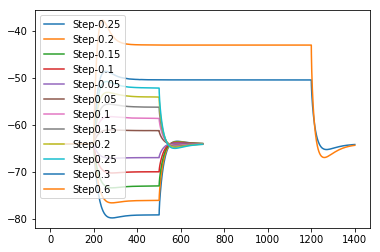

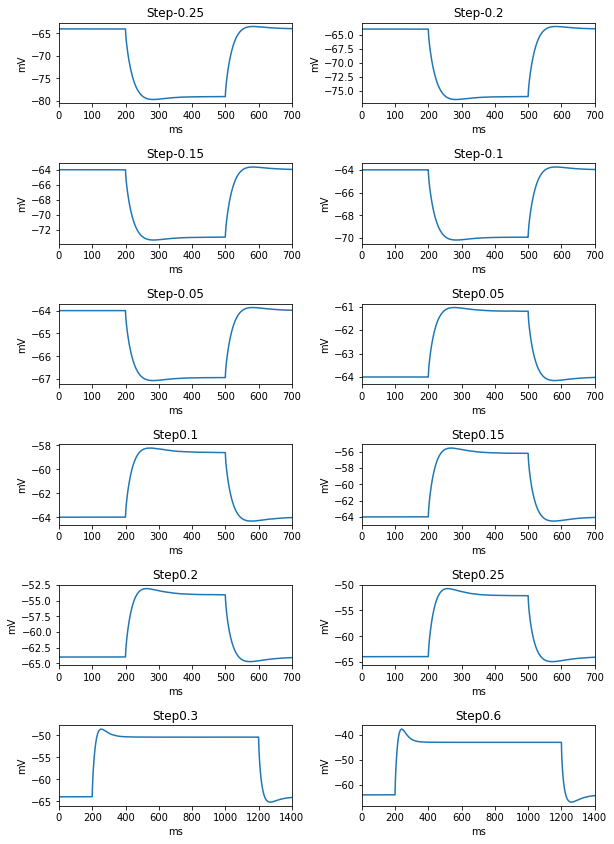

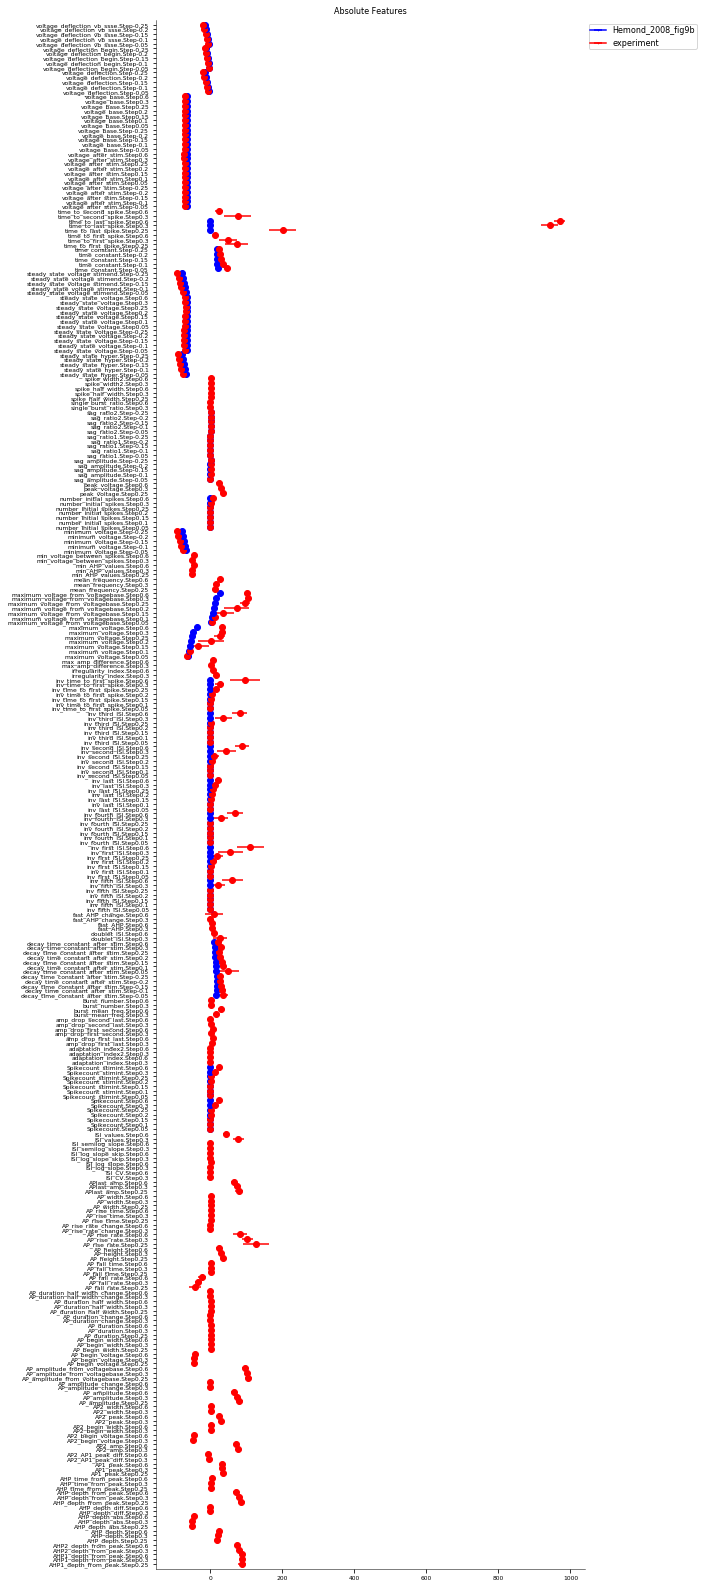

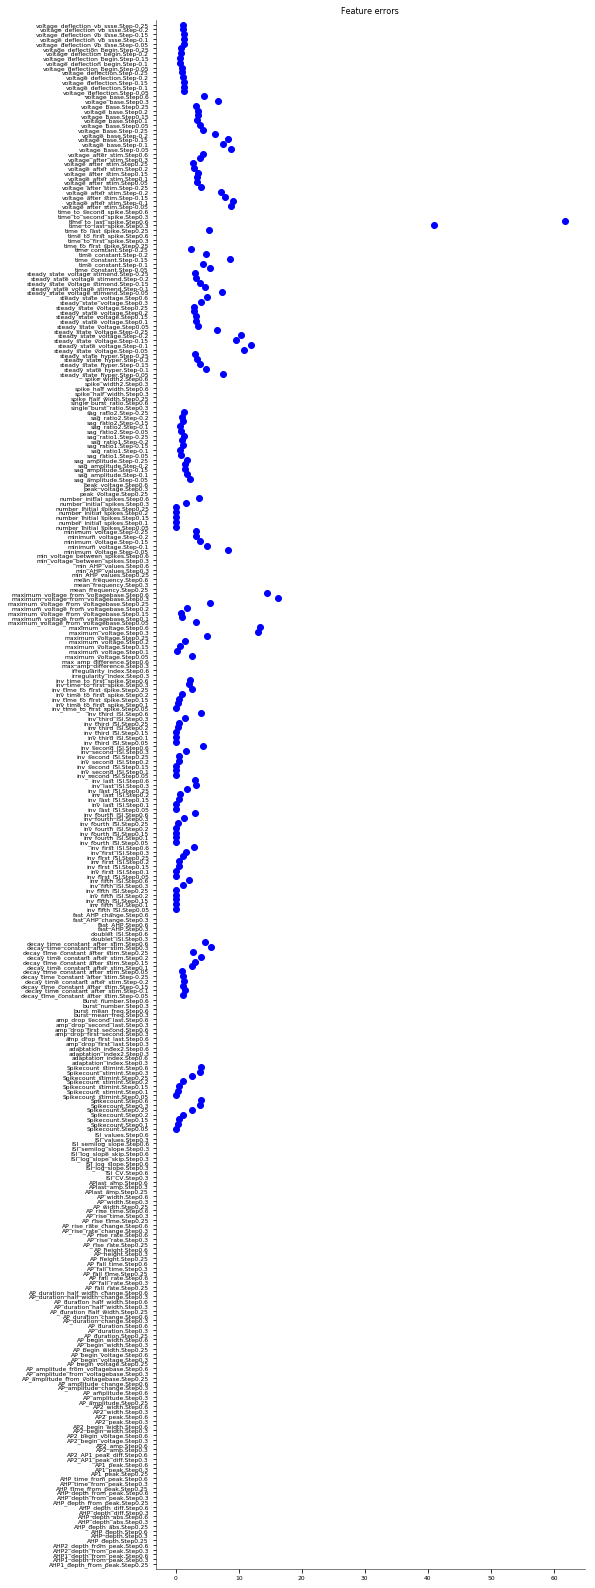

In [4]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/somafeat_stim/stim_rat_CA3_PC_valid_data.json")
with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)
    
# Instantiate test class   
test = tests.SomaticFeaturesTest(observation=observation, config=config, force_run=False, show_plot=True, save_all = True, base_directory=base_directory)

# test.specify_data_set is added to the name of the subdirectory (somaticfeat), so test runs using different data sets can be saved into different directories
test.specify_data_set = 'JMakara_data'

# Number of parallel processes
test.npool = 10

try:
    #Run the test 
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass

### Back-Propagating AP Test

The Back-Propagating AP Test evaluates the efficacy of back-propagating action potentials on the apical trunk in locations of different distances from the soma. The amplitude and half-duration of AP elicitied by 1 ms long rheobase current and the ratio of the amplitude and half-duration of the first and fifth AP of a train elicited by short pulses of 20, 50 and 100 Hz is compared to experimental data from Kim et al. 2012 ( https://doi.org/10.1038/nn.3060).

In [5]:
# Load target data
with open('../target_features/feat_CA3_PC_bAP_test.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

Apical dendritic locations to be tested (with their actual distances): OrderedDict([(('apical_dendrite[6]', 0.8333333333333333), 143.21917492320387), (('apical_dendrite[66]', 0.16666666666666666), 80.0146622605775), (('apical_dendrite[53]', 0.5), 191.16823892257432), (('apical_dendrite[11]', 0.8333333333333333), 276.5008361523603), (('apical_dendrite[25]', 0.8999999999999999), 208.9674477675686), (('apical_dendrite[25]', 0.5), 172.88194141178533), (('apical_dendrite[50]', 0.5), 57.34878252742817), (('apical_dendrite[53]', 0.6111111111111112), 209.5022989891094), (('apical_dendrite[2]', 0.8333333333333333), 107.89044604352297), (('apical_dendrite[53]', 0.9444444444444446), 264.5044791887146), (('apical_dendrite[25]', 0.30000000000000004), 154.8391882338937), (('apical_dendrite[26]', 0.49999999999999994), 288.9106100490724), (('apical_dendrite[72]', 0.16666666666666666), 166.41637067540313), (('apical_dendrite[25]', 0.7), 190.92469458967696), (('apical_dendrite[10]', 0.5), 184.8753254581

/home/saray/.local/lib/python2.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature doublet_ISI: 
Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

Voltage never goes below or above threshold in spike detection.

 Two spikes required for calculation of all_ISI_values.

Feature [all_ISI_values] is missing



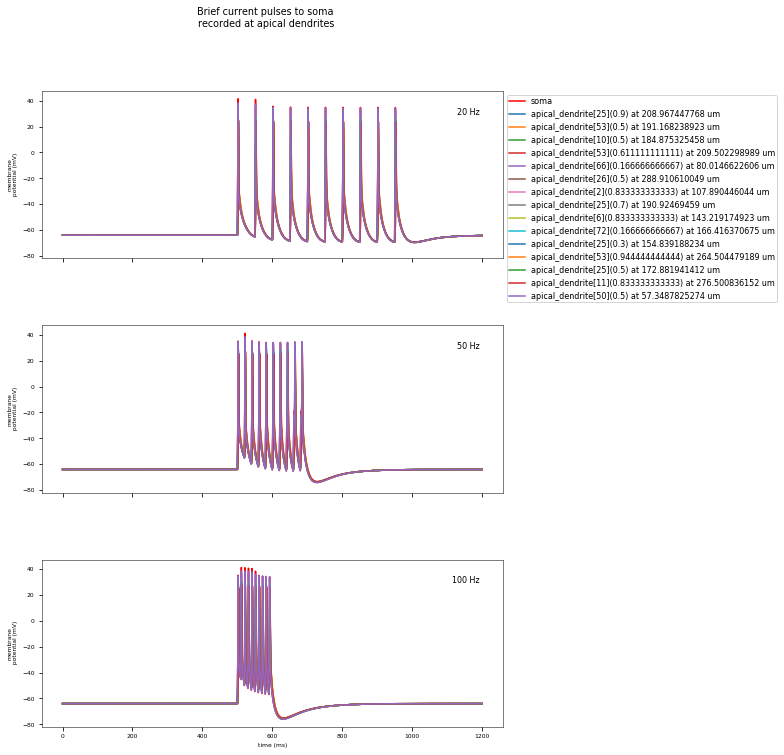

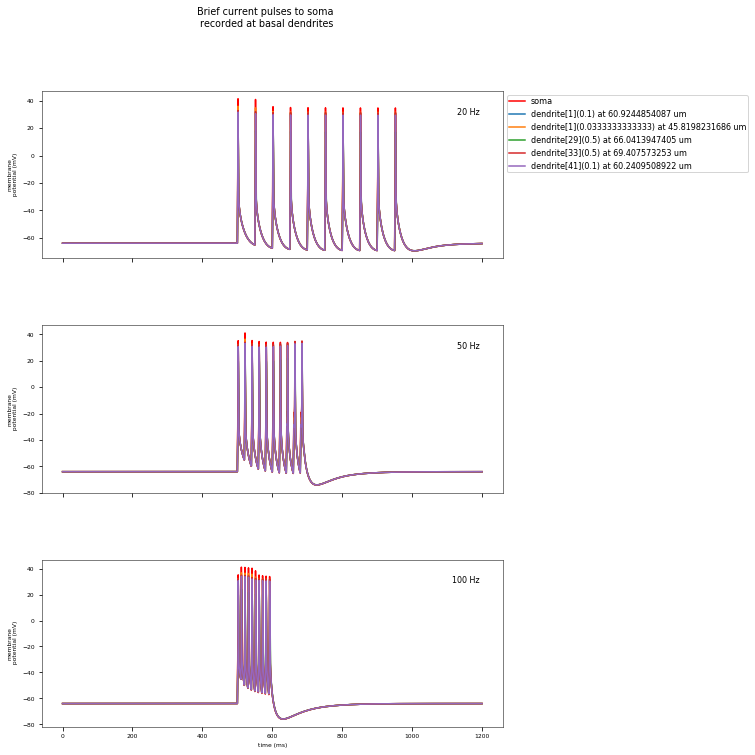

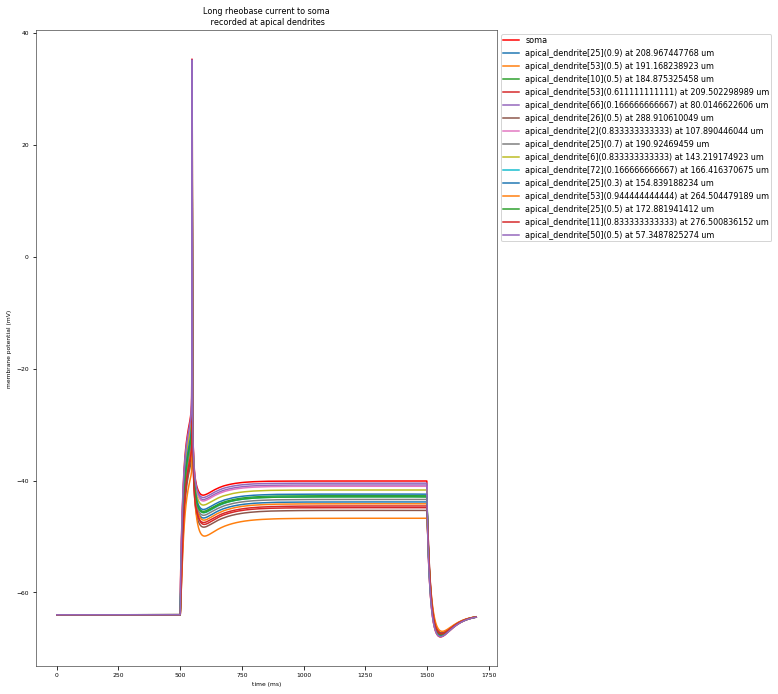

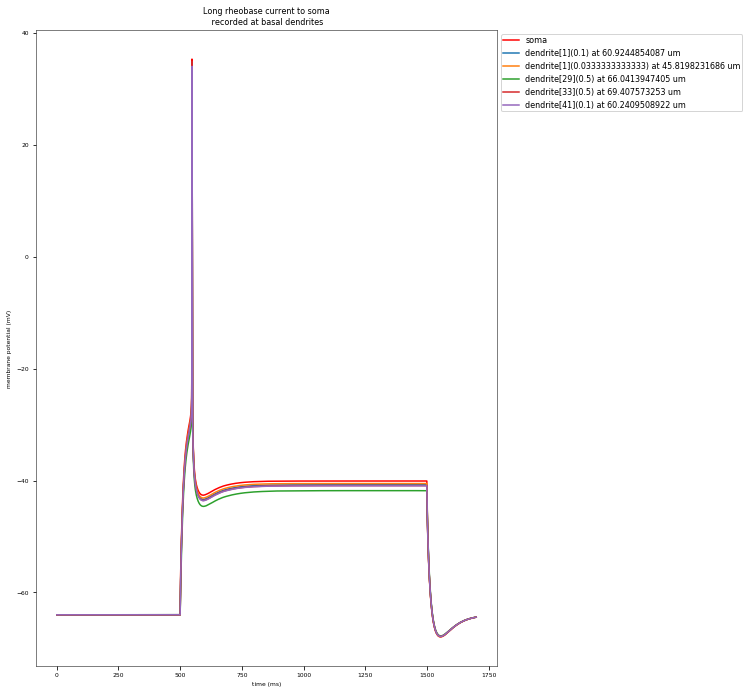

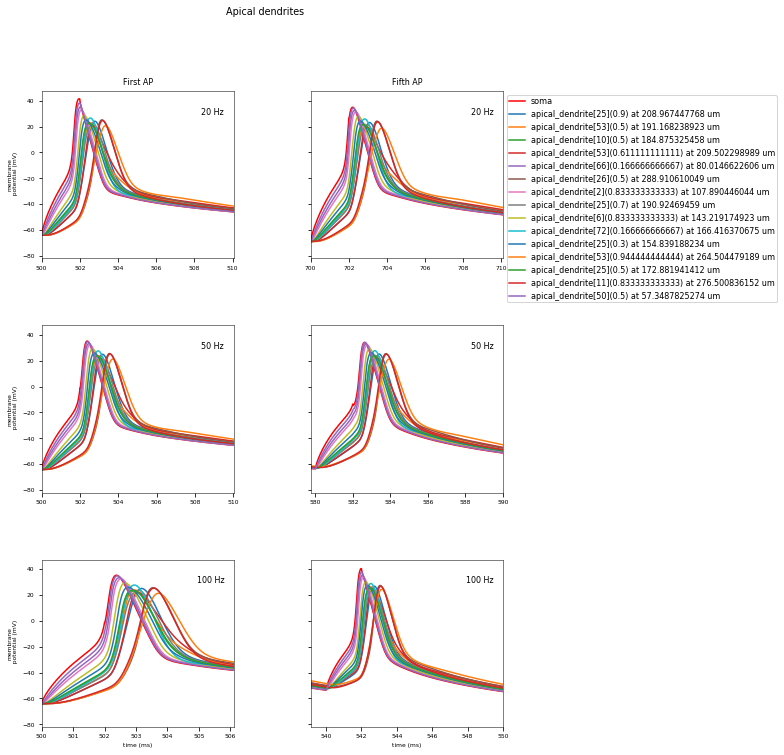

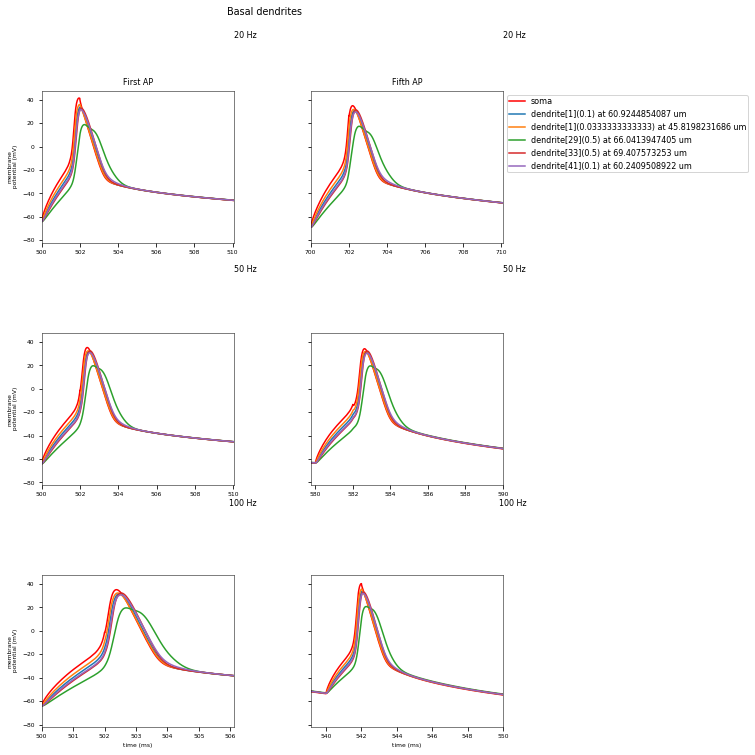

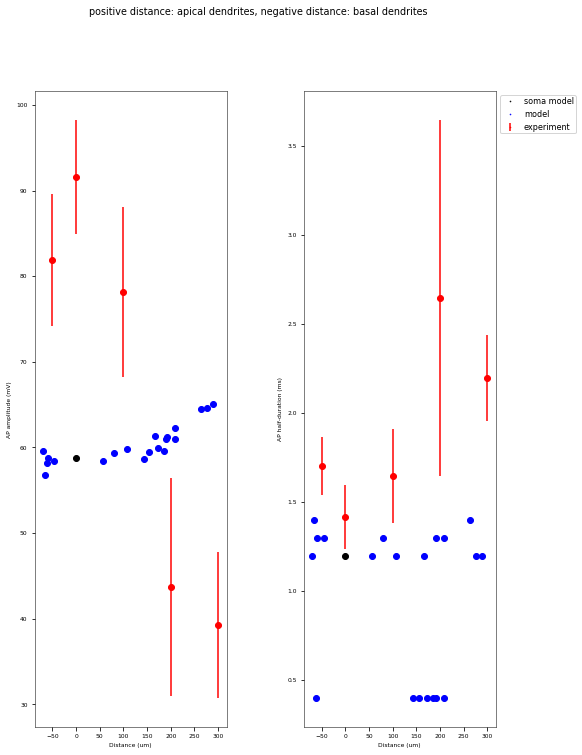

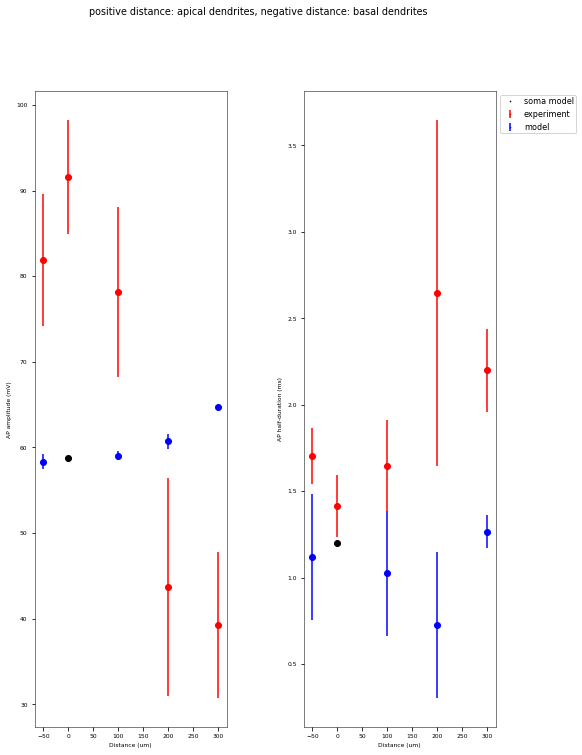

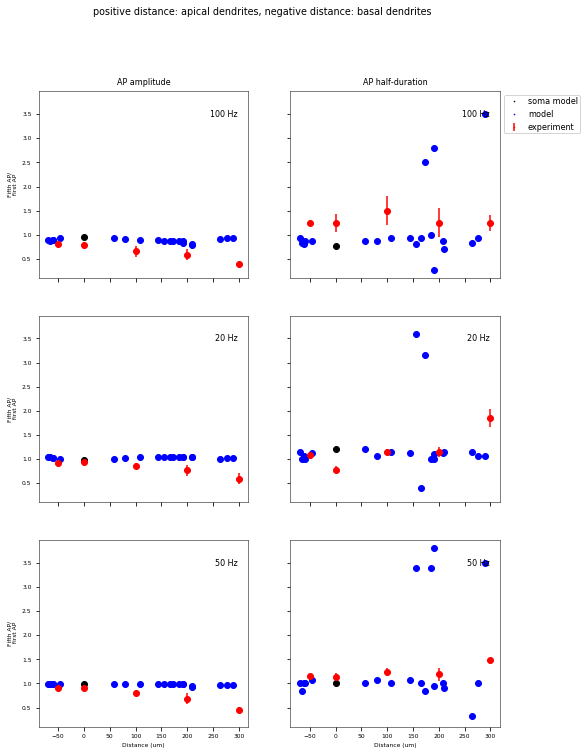

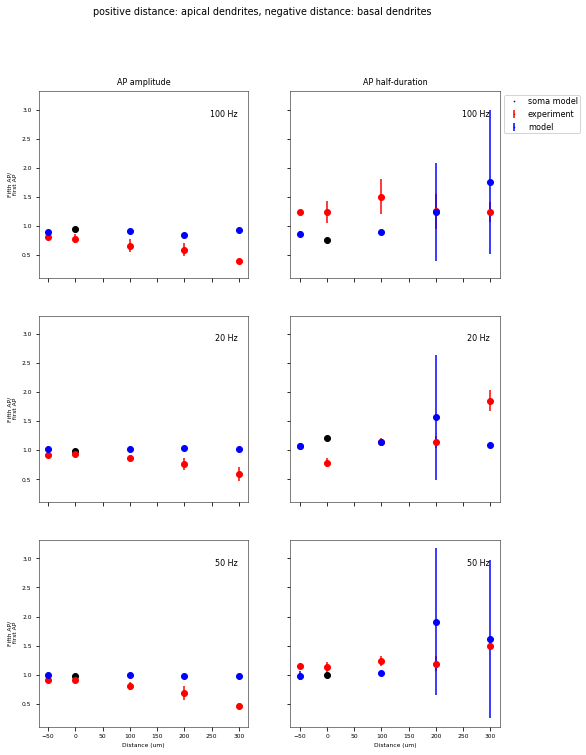

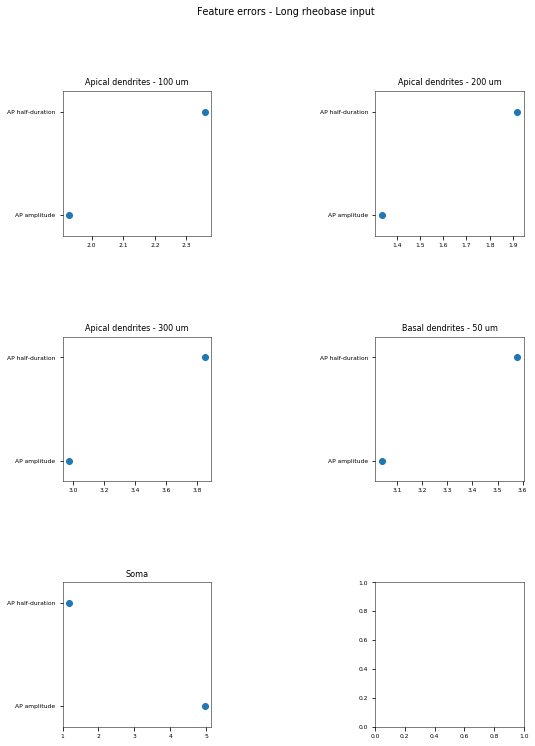

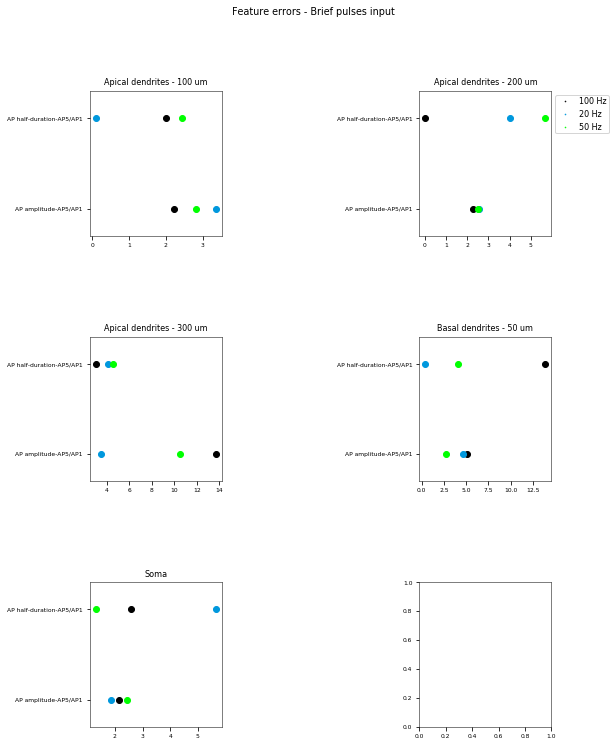

In [6]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/bAP_CA3_PC_stim/stim_bAP_test_CA3_PC.json")

with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)

# Instantiate the test class
test = tests.BackpropagatingAPTest_CA3_PC(config, observation, num_of_apical_dend_locations = 15, num_of_basal_dend_locations = 5, trunk_origin = trunk_origin, basal_origin = basal_origin, base_directory=base_directory, force_run=False, show_plot=True)

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 

In [7]:
%load_ext watermark

In [8]:
%watermark -v -m -p sciunit,efel,numpy,quantities,scipy,matplotlib,neuron

CPython 2.7.12
IPython 5.6.0

sciunit 0.2.0.2
efel 3.0.58
numpy 1.15.1
quantities 0.12.1
scipy 1.2.2
matplotlib 2.0.2
neuron unknown

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.15.0-74-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 56
interpreter: 64bit
